In [1]:
import numpy as np
import seaborn as sns

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.manifold import TSNE

In [2]:
def read_data(filename: str, delimeter=';'):
    with open(filename, mode="r", newline='') as f:
        features = list()
        targets = list()
        for row in f:
            line = list()
            for s in row.split(delimeter):
                s = s.strip()
                if s:
                    line.append(s)
            features.append(list(map(float ,line[1:-1])))
            targets.append(int(line[-1]))
    return features, targets

In [3]:
def plot_embeddings(embedded_tsne, targets, predicted):
    labels = list(range(np.max(targets)+1))
    palette = np.array(sns.color_palette(n_colors=len(labels)))

    patchs = []
    for i, color in enumerate(palette):
        patchs.append(mpatches.Patch(color=color, label=i))


    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.scatter(embedded_tsne[:,0], embedded_tsne[:,1], c=palette[targets])
    plt.legend(handles=patchs, loc='upper right')
    plt.title("Targets")

    plt.subplot(1, 2, 2)
    plt.scatter(embedded_tsne[:,0], embedded_tsne[:,1], c=palette[predicted])
    plt.legend(handles=patchs, loc='upper right')
    plt.title("Predictions")

    plt.show()

In [4]:
features, targets = read_data('glass.data', delimeter=',')
features = np.array(features)
targets = np.array(targets)

In [5]:
features = MinMaxScaler().fit_transform(features)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, stratify=targets, shuffle=True)
x_train.shape, x_test.shape

((171, 9), (43, 9))

In [7]:
parameters = {
    'n_estimators': np.linspace(5, 50, 10, dtype=np.int32),
    'criterion': ['gini', 'entropy'],
    'max_depth': np.linspace(5, 10, 5, dtype=np.int32),
}

clf = GridSearchCV(RandomForestClassifier(), parameters)

In [8]:
clf.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8, 10]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])})

In [9]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 45}

In [10]:
print(classification_report(y_train, clf.predict(x_train), digits=3, zero_division=0))

              precision    recall  f1-score   support

           1      0.982     1.000     0.991        56
           2      1.000     1.000     1.000        61
           3      1.000     0.929     0.963        14
           5      1.000     1.000     1.000        10
           6      1.000     1.000     1.000         7
           7      1.000     1.000     1.000        23

    accuracy                          0.994       171
   macro avg      0.997     0.988     0.992       171
weighted avg      0.994     0.994     0.994       171



In [11]:
print(classification_report(y_test, clf.predict(x_test), digits=3, zero_division=0))

              precision    recall  f1-score   support

           1      0.722     0.929     0.813        14
           2      0.733     0.733     0.733        15
           3      1.000     0.333     0.500         3
           5      0.667     0.667     0.667         3
           6      0.500     1.000     0.667         2
           7      1.000     0.333     0.500         6

    accuracy                          0.721        43
   macro avg      0.770     0.666     0.647        43
weighted avg      0.770     0.721     0.703        43



C:\Users\metar\Documents\GitHub\ISIT_M1\PR_5-6\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\metar\Documents\GitHub\ISIT_M1\PR_5-6\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


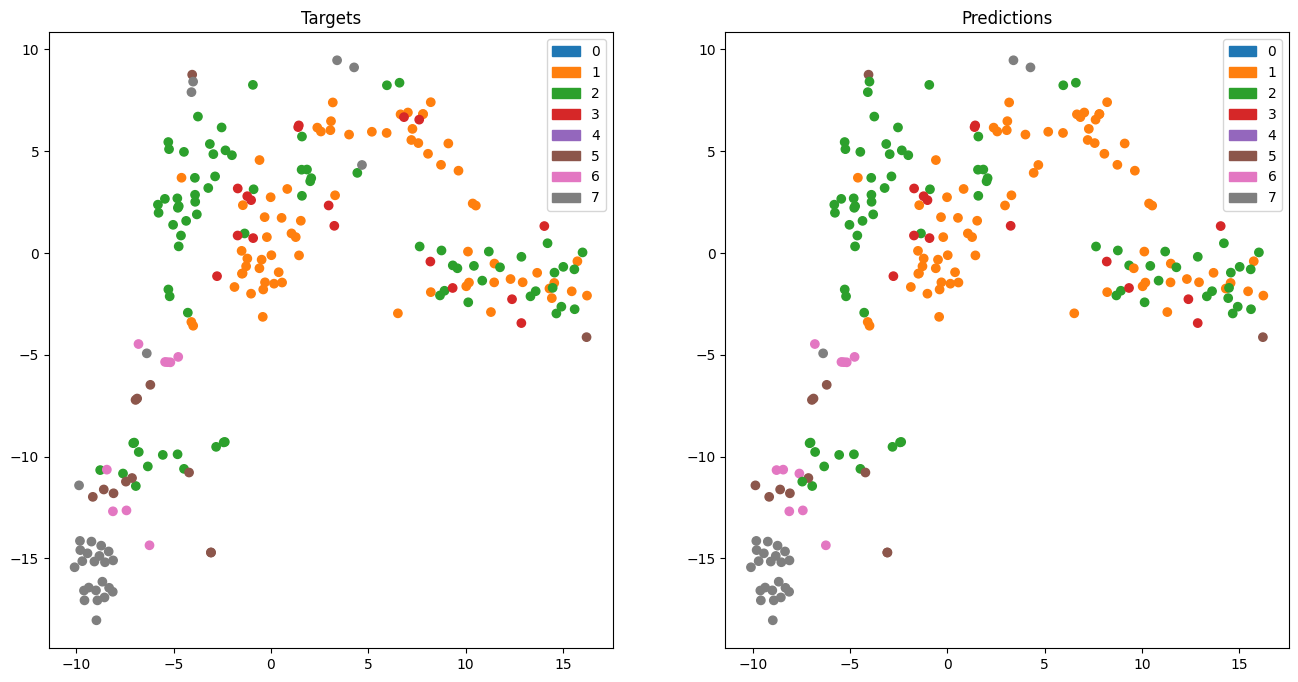

In [12]:
plot_embeddings(TSNE().fit_transform(features), targets, clf.predict(features))